<a href="https://colab.research.google.com/github/daniilomendes/Machine_Learning/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Naive Bayes

In [ ]:
#Importando bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix

In [ ]:
#Base de dados e definição dos previsores(variavel independente x) e a classe(variavel dependente y)
credito = pd.read_csv('/content/drive/MyDrive/FormaçãoCD2/31.Prática em Python/dados/Credit.csv')
credito.shape

(1000, 21)

In [ ]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [ ]:
#Formato de matriz
previsores = credito.iloc[:, 0:20].values
classe = credito.iloc[:, 20].values

In [ ]:
#Transformação dos atributos categoricos em atributos numericos, passando o indice de cada coluna categorica
#precisa-se criar um objeto para cada atributo categorico, pois na sequencia vamos executar o processo de encoding novamente para o registro do teste
#se forem utilizados objetos diferentes, o umero atribuido a cada valor podera ser diferente, o que deixará o teste inconsistente

labelencoder1 = LabelEncoder()
previsores[:,0] = labelencoder1.fit_transform(previsores[:,0])
labelencoder2 = LabelEncoder()
previsores[:,2] = labelencoder2.fit_transform(previsores[:,2])
labelencoder3 = LabelEncoder()
previsores[:,3] = labelencoder3.fit_transform(previsores[:,3])
labelencoder4 = LabelEncoder()
previsores[:,5] = labelencoder4.fit_transform(previsores[:,5])
labelencoder5 = LabelEncoder()
previsores[:,6] = labelencoder5.fit_transform(previsores[:,6])
labelencoder6 = LabelEncoder()
previsores[:,8] = labelencoder6.fit_transform(previsores[:,8])
labelencoder7 = LabelEncoder()
previsores[:,9] = labelencoder7.fit_transform(previsores[:,9])
labelencoder8 = LabelEncoder()
previsores[:,11] = labelencoder8.fit_transform(previsores[:,11])
labelencoder9 = LabelEncoder()
previsores[:,13] = labelencoder9.fit_transform(previsores[:,13])
labelencoder10 = LabelEncoder()
previsores[:,14] = labelencoder10.fit_transform(previsores[:,14])
labelencoder11 = LabelEncoder()
previsores[:,16] = labelencoder11.fit_transform(previsores[:,16])
labelencoder12 = LabelEncoder()
previsores[:,18] = labelencoder12.fit_transform(previsores[:,18])
labelencoder13 = LabelEncoder()
previsores[:,19] = labelencoder13.fit_transform(previsores[:,19])

In [ ]:
#Divisão da base de dados entre treinamento e teste(30 para testar e 70 para treinar)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size = 0.3, random_state = 0)
X_teste

array([[2, 36, 3, ..., 1, 1, 1],
       [0, 9, 3, ..., 2, 0, 0],
       [0, 18, 3, ..., 1, 1, 1],
       ...,
       [0, 24, 1, ..., 1, 0, 1],
       [1, 27, 4, ..., 1, 1, 1],
       [1, 12, 3, ..., 1, 0, 1]], dtype=object)

In [ ]:
#Criação e treinamento do modelo(Geração da tabela de probabilidade)
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, y_treinamento)

GaussianNB()

In [ ]:
#Previsões utilizando os registros de teste
previsoes = naive_bayes.predict(X_teste)
previsoes

array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
      

In [ ]:
#geração da matriz de confusão e calculo da taxa de acerto e erro
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 41,  45],
       [ 42, 172]])

In [ ]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.71

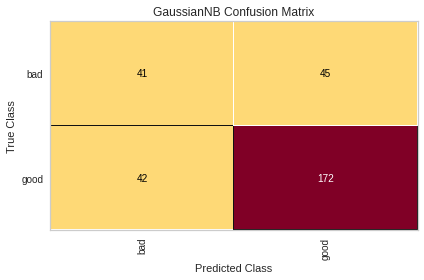

In [ ]:
#visualização da matriz de confusão
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

In [ ]:
#previsão com novo registro, transformando os atributos categóricos em numericos
novocredito = pd.read_csv('/content/drive/MyDrive/FormaçãoCD2/31.Prática em Python/dados/NovoCredit.csv')
novocredito.shape

(1, 20)

In [ ]:
#usamos o mesmo objeto que foi criado antes para manter o padrão dos dados
#chamando somente o método transform, pois a adaptação aos dados(fit) já foi feita anteriormente

novo_credito = novocredito.iloc[:, 0:20].values
novo_credito[:,0] = labelencoder1.transform(novo_credito[:,0])
novo_credito[:,2] = labelencoder2.transform(novo_credito[:,2])
novo_credito[:,3] = labelencoder3.transform(novo_credito[:,3])
novo_credito[:,5] = labelencoder4.transform(novo_credito[:,5])
novo_credito[:,6] = labelencoder5.transform(novo_credito[:,6])
novo_credito[:,8] = labelencoder6.transform(novo_credito[:,8])
novo_credito[:,9] = labelencoder7.transform(novo_credito[:,9])
novo_credito[:,11] = labelencoder8.transform(novo_credito[:,11])
novo_credito[:,13] = labelencoder9.transform(novo_credito[:,13])
novo_credito[:,14] = labelencoder10.transform(novo_credito[:,14])
novo_credito[:,16] = labelencoder11.transform(novo_credito[:,16])
novo_credito[:,18] = labelencoder12.transform(novo_credito[:,18])
novo_credito[:,19] = labelencoder13.transform(novo_credito[:,19])

In [ ]:
#resultado da previsão
naive_bayes.predict(novo_credito)

array(['good'], dtype='<U4')

#Árvores de Decisão

In [ ]:
#Bibliotecas
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz

In [ ]:
#base de dados
credito = pd.read_csv('/content/drive/MyDrive/FormaçãoCD2/31.Prática em Python/dados/Credit.csv')
credito.shape

(1000, 21)

In [ ]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [ ]:
#Formato de matriz
previsores = credito.iloc[:, 0:20].values
classe = credito.iloc[:, 20].values

In [ ]:
#conversão dos atributos categoricos para numericos, passando o indice de cada atributo categorico
labelencoder = LabelEncoder()
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:,3] = labelencoder.fit_transform(previsores[:,3])
previsores[:,5] = labelencoder.fit_transform(previsores[:,5])
previsores[:,6] = labelencoder.fit_transform(previsores[:,6])
previsores[:,8] = labelencoder.fit_transform(previsores[:,8])
previsores[:,9] = labelencoder.fit_transform(previsores[:,9])
previsores[:,11] = labelencoder.fit_transform(previsores[:,11])
previsores[:,13] = labelencoder.fit_transform(previsores[:,13])
previsores[:,14] = labelencoder.fit_transform(previsores[:,14])
previsores[:,16] = labelencoder.fit_transform(previsores[:,16])
previsores[:,18] = labelencoder.fit_transform(previsores[:,18])
previsores[:,19] = labelencoder.fit_transform(previsores[:,19])

In [ ]:
#divisão da base de dados entre treinamento e teste. usamos 30 para testar e 70 para treinar. Random_state = 0 para sempre obter a mesma divisão da base quando o codigo for rodado
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, 
                                                                  test_size = 0.3, 
                                                                  random_state = 0)

In [ ]:
#criação e treinamento do modelo
arvore = DecisionTreeClassifier()
arvore.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#exportação da árvore de decisão para o formato .dot, para posterior visualização
#webgraphviz.com
export_graphviz(arvore, out_file = 'tree.dot')

In [ ]:
#Obtenção das previsões
previsoes = arvore.predict(X_teste)
previsoes

array(['bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'good',
       'good', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'bad', 'bad', 'good', 'good', 'bad',
       'bad', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'bad', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'bad',
   

In [ ]:
#Matriz de confusão
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 46,  40],
       [ 47, 167]])

In [ ]:
#taxa de acerto
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.71

In [ ]:
#Taxa de erro
taxa_erro = 1 - taxa_acerto
taxa_erro

0.29000000000000004

#Seleção de Atributos

In [ ]:
#Bibliotecas
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
#base de dados
credito = pd.read_csv('/content/drive/MyDrive/FormaçãoCD2/31.Prática em Python/dados/Credit.csv')
credito

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,<100,4<=X<7,3,'female div/dep/mar',none,4,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,<0,30,'existing paid','used car',3857,<100,1<=X<4,4,'male div/sep',none,4,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,'existing paid',radio/tv,1845,<100,1<=X<4,4,'male single',none,4,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


In [ ]:
#Formato de matriz
previsores = credito.iloc[:, 0:20].values
classe = credito.iloc[:, 20].values

In [ ]:
#conversão dos atributos categoricos para numericos, passando o indice de cada atributo categorico
labelencoder = LabelEncoder()
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:,3] = labelencoder.fit_transform(previsores[:,3])
previsores[:,5] = labelencoder.fit_transform(previsores[:,5])
previsores[:,6] = labelencoder.fit_transform(previsores[:,6])
previsores[:,8] = labelencoder.fit_transform(previsores[:,8])
previsores[:,9] = labelencoder.fit_transform(previsores[:,9])
previsores[:,11] = labelencoder.fit_transform(previsores[:,11])
previsores[:,13] = labelencoder.fit_transform(previsores[:,13])
previsores[:,14] = labelencoder.fit_transform(previsores[:,14])
previsores[:,16] = labelencoder.fit_transform(previsores[:,16])
previsores[:,18] = labelencoder.fit_transform(previsores[:,18])
previsores[:,19] = labelencoder.fit_transform(previsores[:,19])

In [ ]:
#divisão da base de dados entre treinamento e teste. usamos 30 para testar e 70 para treinar. Random_state = 0 para sempre obter a mesma divisão da base quando o codigo for rodado
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, 
                                                                  test_size = 0.3, 
                                                                  random_state = 0)

In [ ]:
#criação do modelo, trinamento, obtenção das previsões e da taxa de acerto
svm = SVC()
svm.fit(X_treinamento, y_treinamento)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#Obtenção das previsões
previsoes = svm.predict(X_teste)
previsoes

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'g

In [ ]:
#taxa de acerto
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.7166666666666667

In [ ]:
#Utilizando do algoritmo ExtraTreesClassifier para extrair as caracteristicas mais importantes
forest = ExtraTreesClassifier()
forest.fit(X_treinamento, y_treinamento)
importancias = forest.feature_importances_
importancias

array([0.11264243, 0.08701297, 0.06064367, 0.06132272, 0.08151476,
       0.04697442, 0.05080232, 0.05133082, 0.04267459, 0.02570806,
       0.05031705, 0.04827999, 0.06363126, 0.03718803, 0.03640136,
       0.03427395, 0.04492253, 0.02389648, 0.03305314, 0.00740945])

In [ ]:
#criação de nova base de dados utilizando somentoe os atributos mais importantes
X_treinamento2 = X_treinamento[:,[0,1,2,3]]
X_teste2 = X_teste[:,[0,1,2,3]]

In [ ]:
#criação de outrp modelo com base de dados reduzida, treinando e obtendo as previsçõe e taxa de acerto
svm2 = SVC()
svm2.fit(X_treinamento2, y_treinamento)
previsoes2 = svm2.predict(X_teste2)
taxa_acerto = accuracy_score(y_teste, previsoes2)
taxa_acerto

0.7133333333333334

#Aprendizado Baseado em Instância

In [ ]:
#Bibliotecas
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from scipy import stats

In [ ]:
#Base de dados
iristemp = pd.read_csv('/content/drive/MyDrive/FormaçãoCD2/31.Prática em Python/dados/iris.csv')
iristemp.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#carregamento da base de dados e visualização
iris = datasets.load_iris()
stats.describe(iris.data)

DescribeResult(nobs=150, minmax=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])), mean=array([5.84333333, 3.05733333, 3.758     , 1.19933333]), variance=array([0.68569351, 0.18997942, 3.11627785, 0.58100626]), skewness=array([ 0.31175306,  0.31576711, -0.27212767, -0.10193421]), kurtosis=array([-0.57356795,  0.18097632, -1.39553589, -1.33606741]))

In [ ]:
#classe de dados
#iris.target
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
#criação dos previsores
previsores = iris.data
classe = iris.target

In [ ]:
#divisão da base de dados entre treinamento e teste. usamos 30 para testar e 70 para treinar. Random_state = 0 para sempre obter a mesma divisão da base quando o codigo for rodado
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, 
                                                                  test_size = 0.3, 
                                                                  random_state = 0)

len(X_treinamento)

105

In [ ]:
#Criação do modelo, treinamento
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_treinamento, y_treinamento)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
#Obtenção das previsões
previsoes = knn.predict(X_teste)
previsoes

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [ ]:
#Matriz de confusão
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

In [ ]:
#taxa de acerto e erro
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.9777777777777777

#Ensamble Learning com Random Forest

In [ ]:
#Bibliotecas
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#base de dados
credito = pd.read_csv('/content/drive/MyDrive/FormaçãoCD2/31.Prática em Python/dados/Credit.csv')
credito

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,<100,4<=X<7,3,'female div/dep/mar',none,4,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,<0,30,'existing paid','used car',3857,<100,1<=X<4,4,'male div/sep',none,4,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,'existing paid',radio/tv,1845,<100,1<=X<4,4,'male single',none,4,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


In [ ]:
#Formato de matriz
previsores = credito.iloc[:, 0:20].values
classe = credito.iloc[:, 20].values

In [ ]:
#conversão dos atributos categoricos para numericos, passando o indice de cada atributo categorico
labelencoder = LabelEncoder()
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:,3] = labelencoder.fit_transform(previsores[:,3])
previsores[:,5] = labelencoder.fit_transform(previsores[:,5])
previsores[:,6] = labelencoder.fit_transform(previsores[:,6])
previsores[:,8] = labelencoder.fit_transform(previsores[:,8])
previsores[:,9] = labelencoder.fit_transform(previsores[:,9])
previsores[:,11] = labelencoder.fit_transform(previsores[:,11])
previsores[:,13] = labelencoder.fit_transform(previsores[:,13])
previsores[:,14] = labelencoder.fit_transform(previsores[:,14])
previsores[:,16] = labelencoder.fit_transform(previsores[:,16])
previsores[:,18] = labelencoder.fit_transform(previsores[:,18])
previsores[:,19] = labelencoder.fit_transform(previsores[:,19])

In [ ]:
#divisão da base de dados entre treinamento e teste. usamos 30 para testar e 70 para treinar. Random_state = 0 para sempre obter a mesma divisão da base quando o codigo for rodado
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, 
                                                                  test_size = 0.3, 
                                                                  random_state = 0)

In [ ]:
#criação do modelo, treinamento, obtenção das previsoes e da taxa de acerto
floresta = RandomForestClassifier(n_estimators = 100)
floresta.fit(X_treinamento, y_treinamento)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#visualizando os atributos principais
#floresta.estimators_
floresta.estimators_[1]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1803800957, splitter='best')

In [ ]:
previsoes = floresta.predict(X_teste)
confusao = confusion_matrix(y_teste, previsoes)
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.7833333333333333

#Agrupamento com K-means

In [ ]:
#Bibliotecas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
#base de dados
iris = datasets.load_iris()

In [ ]:
#visualização de quantos registros existem por classe
unicos, quantidade = np.unique(iris.target, return_counts = True)
unicos

array([0, 1, 2])

In [ ]:
quantidade

array([50, 50, 50])

In [ ]:
#Agrupamento com K-means, utilizando 3 clusters
cluster = KMeans(n_clusters = 3)
cluster.fit(iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
#visualização dos três centroides
centroides = cluster.cluster_centers_
centroides

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
#visualização dos grupos de registro foi associado
previsoes = cluster.labels_
previsoes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
#contafem dos registros por classe
unicos2, quantidade2 = np.unique(previsoes, return_counts = True)
unicos2

array([0, 1, 2], dtype=int32)

In [ ]:
quantidade2

array([62, 50, 38])

In [ ]:
#geração da matriz de contigencia para comparar os grupos com base de dados
resultados = confusion_matrix(iris.target, previsoes)
resultados

array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]])

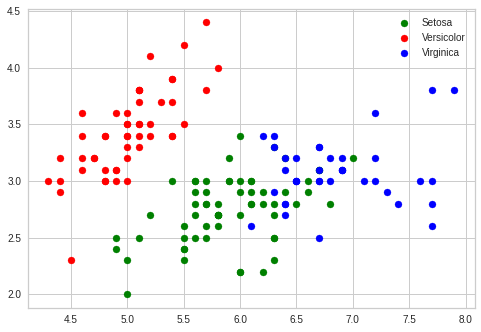

In [ ]:
#geração do grafico com os clusters gerados, considerando para um 
#usando somente as colinas 0 e 1 da base de dados original para termos 2 dimensões
plt.scatter(iris.data[previsoes == 0, 0], iris.data[previsoes == 0, 1], c = 'green', label = 'Setosa')
plt.scatter(iris.data[previsoes == 1, 0], iris.data[previsoes == 1, 1], c = 'red', label = 'Versicolor')
plt.scatter(iris.data[previsoes == 2, 0], iris.data[previsoes == 2, 1], c = 'blue', label = 'Virginica')
plt.legend()

#C-Means

In [ ]:
!pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 7.6 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=05cded21f7f21525f7a55f34b5f7113f30c25f6c928be66024a637b4cc5b8b25
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
#Bibliotecas
import skfuzzy

In [ ]:
#base de dados
iris = datasets.load_iris()

In [ ]:
#aplicação do algoritmo definindo tre cluster e passando a matriz transposta. Os outros parametros sao obrigatorios e são os default indicados na documentação
r = skfuzzy.cmeans(data = iris.data.T, c = 3, m = 2, error = 0.005, maxiter = 1000, init = None)

In [ ]:
#obtendo as porcentafens de um registro pertencer a um cluster que está na posição 1 da matriz
previsoes_porcentagem = r[1]

In [ ]:
#visualizando a probabilidade de um registro pertencer a cada um dos cluster
for x in range(150):
	print(previsoes_porcentagem[0][x], previsoes_porcentagem[1][x], previsoes_porcentagem[2][x])

0.002304453594940173 0.9966236414087678 0.0010719049962919067
0.016661708909156508 0.9758362820348909 0.007502009055952549
0.013767468198139073 0.9798153279316031 0.00641720387025782
0.0224812318564523 0.9674059065526247 0.010112861590922867
0.0037621497443346553 0.9944699666156762 0.0017678836399890442
0.044831710773246214 0.9345393285561922 0.020628960670561663
0.014012061031047433 0.9794806610687551 0.00650727790019759
0.000311752767121139 0.9995469668350466 0.00014128039783233473
0.047748735170121855 0.9303387685476107 0.0219124962822676
0.011944666849621468 0.9827106905583076 0.005344642592070931
0.021767975481026366 0.9680271409149364 0.010204883604037408
0.005436292574642713 0.9921310747440006 0.002432632681356799
0.0201965468012557 0.9706217089443226 0.009181744254421734
0.05182182783251813 0.922932643547289 0.02524552862019282
0.07263744857993869 0.8897188413826406 0.03764371003742066
0.10438763085620663 0.8412883681088741 0.05432400103491937
0.03559466556351661 0.946903808795

In [ ]:
#geração de matriz de contigencia para comparação com as classes originais da base dedados
previsoes = previsoes_porcentagem.argmax(axis = 0)
resultados = confusion_matrix(iris.target, previsoes)
resultados

array([[ 0, 50,  0],
       [47,  0,  3],
       [13,  0, 37]])

#K-Medoids

In [ ]:
!pip install pyclustering

     |████████████████████████████████| 2.6 MB 8.4 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395121 sha256=26b03b4bd001c0755f9c0f840d0fce100caabcde42a2304bd13d4816f91a6fee
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering


In [ ]:
#bibliotacas
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer

In [ ]:
#base de dados
iris = datasets.load_iris()

In [ ]:
#Configurando os parametros do k-medoids, utilizando somente duas preimeira colunas da base de dados por conta da visualização apenas
#3, 12 e 20 são indices aleatorios de registros dabase de dados
cluster = kmedoids(iris.data[:, 0:2], [3,12,20])
#Visualizando ospontos escolhidos
cluster.get_medoids()

[3, 12, 20]

In [ ]:
#Aplicação do algoritmo para o agrupamento, obtenção da previsões e vizualizando os medoides
cluster.process()
previsoes = cluster.get_clusters()
medoids = cluster.get_medoids()
#Lista de 3 elements, com os indices dos registros do cluster
previsoes

[[50,
  51,
  52,
  54,
  56,
  58,
  65,
  74,
  75,
  76,
  77,
  86,
  100,
  102,
  103,
  104,
  105,
  107,
  108,
  109,
  110,
  111,
  112,
  115,
  116,
  117,
  118,
  120,
  122,
  124,
  125,
  128,
  129,
  130,
  131,
  132,
  135,
  136,
  137,
  139,
  140,
  141,
  143,
  144,
  145,
  147,
  148],
 [53,
  55,
  57,
  59,
  60,
  61,
  62,
  63,
  64,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  101,
  113,
  114,
  119,
  121,
  123,
  126,
  127,
  133,
  134,
  138,
  142,
  146,
  149],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  106]]

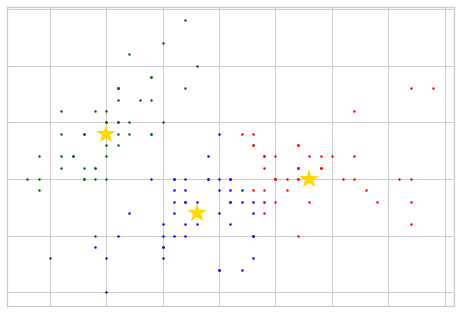

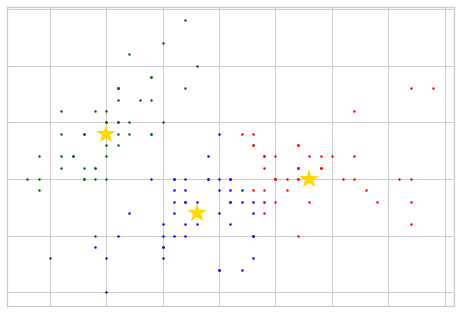

In [ ]:
#Visualizando o agrupamento
v = cluster_visualizer()
v.append_clusters(previsoes, iris.data[:,0:2])
v.append_cluster(medoids, data = iris.data[:,0:2], marker = '*', markersize = 20)
v.show()

In [ ]:
#codigo para criar duas listas, uma com os grupos reais da base de dados e outra com os elmentos dos grupos
#utilizando posteriormnete para visualização da matruz de contigencias
lista_previsoes = []
lista_real = []
for i in range(len(previsoes)):
	for j in range(len(previsoes[i])):
		lista_previsoes.append(i)
		lista_real.append(iris.target[previsoes[i][j]])

In [ ]:
#Geração da atriz de contigencia comparando os grupos reias com os grupos previstos
lista_previsoes = np.asarray(lista_previsoes)
lista_real = np.asarray(lista_real)
resultados = confusion_matrix(lista_real, lista_previsoes)
resultados

array([[ 0,  0, 50],
       [12, 38,  0],
       [35, 14,  1]])

#Regras de Associação

In [ ]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=ba2754c4df96c4e1b0bce7a02d4600f2c9ad01c9950b9b14c79a7ff5ef94523c
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [ ]:
#Bibliotecas
from apyori import apriori

In [ ]:
#base de dados
dados = pd.read_csv('/content/drive/MyDrive/FormaçãoCD2/31.Prática em Python/dados/transacoes.txt', header = None)
dados

,0,1,2
0,Cerveja,Pizza,Sorvete
1,Pizza,Sorvete,NaN
2,Cerveja,Pizza,NaN
3,Cerveja,Pizza,Sorvete
4,Cerveja,Pizza,NaN
5,Pizza,NaN,NaN


In [ ]:
#transformando para o formato de lista, que é exigido pela biblioteca, 6 é a quantidade de itens na base de dados
transacoes = []
for i in range(0,6):
	transacoes.append([str(dados.values[i,j]) for j in range(0,3)])
transacoes

[['Cerveja', 'Pizza', 'Sorvete'],
 ['Pizza', 'Sorvete', 'nan'],
 ['Cerveja', 'Pizza', 'nan'],
 ['Cerveja', 'Pizza', 'Sorvete'],
 ['Cerveja', 'Pizza', 'nan'],
 ['Pizza', 'nan', 'nan']]

In [ ]:
#Execuções do algoritmo apriori para geração das regras de associação definindo os parametros de suporte e confiança
regras = apriori(transacoes, min_support = 0.5, min_confidence = 0.5, min_length = 2)

In [ ]:
#Criação de nova variavel para armazenar somente as regras de associação
resultados = list(regras)
print(resultados[0])
resultados

RelationRecord(items=frozenset({'Cerveja'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Cerveja'}), confidence=0.6666666666666666, lift=1.0)])


[RelationRecord(items=frozenset({'Cerveja'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Cerveja'}), confidence=0.6666666666666666, lift=1.0)]),
 RelationRecord(items=frozenset({'Pizza'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Pizza'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'Sorvete'}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Sorvete'}), confidence=0.5, lift=1.0)]),
 RelationRecord(items=frozenset({'nan'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'nan'}), confidence=0.6666666666666666, lift=1.0)]),
 RelationRecord(items=frozenset({'Cerveja', 'Pizza'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Cerveja', 'Pizza'}), confidence=0.6666666666666666, li

In [ ]:
#criação de nova variacel percorrendo a variavel anterios para uma melhor visualização dos resultados
resultados2 = [list(x) for x in resultados]
resultados2

[[frozenset({'Cerveja'}),
  0.6666666666666666,
  [OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Cerveja'}), confidence=0.6666666666666666, lift=1.0)]],
 [frozenset({'Pizza'}),
  1.0,
  [OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Pizza'}), confidence=1.0, lift=1.0)]],
 [frozenset({'Sorvete'}),
  0.5,
  [OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Sorvete'}), confidence=0.5, lift=1.0)]],
 [frozenset({'nan'}),
  0.6666666666666666,
  [OrderedStatistic(items_base=frozenset(), items_add=frozenset({'nan'}), confidence=0.6666666666666666, lift=1.0)]],
 [frozenset({'Cerveja', 'Pizza'}),
  0.6666666666666666,
  [OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Cerveja', 'Pizza'}), confidence=0.6666666666666666, lift=1.0),
   OrderedStatistic(items_base=frozenset({'Cerveja'}), items_add=frozenset({'Pizza'}), confidence=1.0, lift=1.0),
   OrderedStatistic(items_base=frozenset({'Pizza'}), items_add=frozenset({'Cerveja'}), confi

In [ ]:
#criando outra variavel para visualização das regras ficar mais facil para o usuario
resultados3 = []
for j in range(0,7):
	resultados3.append([list(x) for x in resultados[j][2]])
resultados3

[[[frozenset(), frozenset({'Cerveja'}), 0.6666666666666666, 1.0]],
 [[frozenset(), frozenset({'Pizza'}), 1.0, 1.0]],
 [[frozenset(), frozenset({'Sorvete'}), 0.5, 1.0]],
 [[frozenset(), frozenset({'nan'}), 0.6666666666666666, 1.0]],
 [[frozenset(), frozenset({'Cerveja', 'Pizza'}), 0.6666666666666666, 1.0],
  [frozenset({'Cerveja'}), frozenset({'Pizza'}), 1.0, 1.0],
  [frozenset({'Pizza'}), frozenset({'Cerveja'}), 0.6666666666666666, 1.0]],
 [[frozenset(), frozenset({'Pizza', 'Sorvete'}), 0.5, 1.0],
  [frozenset({'Pizza'}), frozenset({'Sorvete'}), 0.5, 1.0],
  [frozenset({'Sorvete'}), frozenset({'Pizza'}), 1.0, 1.0]],
 [[frozenset(), frozenset({'Pizza', 'nan'}), 0.6666666666666666, 1.0],
  [frozenset({'Pizza'}), frozenset({'nan'}), 0.6666666666666666, 1.0],
  [frozenset({'nan'}), frozenset({'Pizza'}), 1.0, 1.0]]]